In [116]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import statsmodels.graphics.tsaplots as sgt #for ACF and PACF plots 
import statsmodels.tsa.stattools as sts #for Augmented Dicky-Fuller test of stationarity 
from scipy.stats.distributions import chi2 
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [118]:
data =pd.read_csv("RSFHFS.csv", header=0, index_col=0, na_values=".")
data.index=pd.to_datetime(data.index)
data=data.ffill()
data=data['2000':'2019']
data.columns=['sales']
data.head(3)

,sales
observation_date,
2000-01-01,7484
2000-02-01,7548
2000-03-01,7599


# Plotting the time series

In [121]:
data['ret']=data.sales.pct_change()*100
data['sqret']=data.ret.mul(data.ret)
data['ret'].dropna(inplace=True) 
data.head(3)

,sales,ret,sqret
observation_date,,,
2000-01-01,7484,NaN,NaN
2000-02-01,7548,0.855158,0.731295
2000-03-01,7599,0.675676,0.456538


Text(0.5, 1.0, 'Sales Returns ')

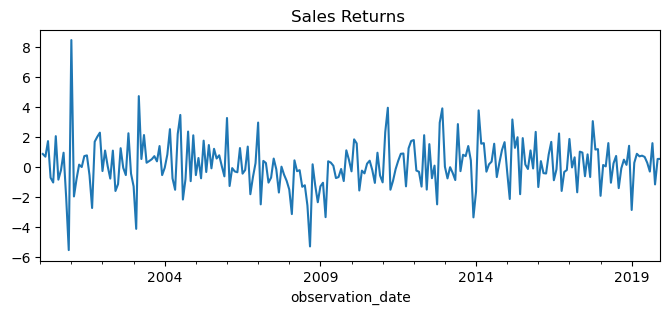

In [123]:
data.ret.plot(figsize=(8,3))
plt.title("Sales Returns ")

Text(0.5, 1.0, 'PACF for Sales Returns')

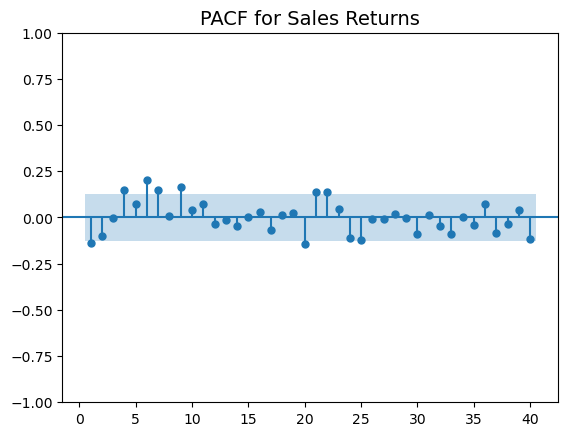

In [125]:
sgt.plot_pacf(data.ret[1:], lags=40, zero=False, method='ols')
plt.title("PACF for Sales Returns", size=14)

# ARMA vs ARIMA

## ARIMA (1,1,1) For Sales

In [128]:
model_sales = ARIMA(data['sales'], order=(1, 1, 1))  
results_sales = model_sales.fit()
results_sales.summary()

C:\Users\tapiw\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tapiw\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tapiw\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                  240
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1501.462
Date:                Sun, 09 Mar 2025   AIC                           3008.925
Time:                        21:06:55   BIC                           3019.354
Sample:                    01-01-2000   HQIC                          3013.127
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0920      0.504      0.183      0.855      -0.895       1.079
ma.L1         -0.2344      0.487     -0.481      0.631      -1.190       0.721
sigma2      1.689e+04   1148.747     14.701      0.000    1.46e+04    1.91e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                34.70
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.04
Prob(H) (two-sided):                  0.18   Kurtosis:                         4.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## ARMA (1,1) on sales returns

In [130]:
model_sales_returns = ARIMA(data['ret'], order=(1, 0, 1))  
results_sales_returns = model_sales.fit()
results_sales_returns.summary()

C:\Users\tapiw\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tapiw\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tapiw\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                  240
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1501.462
Date:                Sun, 09 Mar 2025   AIC                           3008.925
Time:                        21:06:56   BIC                           3019.354
Sample:                    01-01-2000   HQIC                          3013.127
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0920      0.504      0.183      0.855      -0.895       1.079
ma.L1         -0.2344      0.487     -0.481      0.631      -1.190       0.721
sigma2      1.689e+04   1148.747     14.701      0.000    1.46e+04    1.91e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                34.70
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.04
Prob(H) (two-sided):                  0.18   Kurtosis:                         4.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [131]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['sales'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -1.4240930629844362
p-value: 0.5706726630057004


### The ADF test returned a p-value of 0.57, which is greater than 0.05. Therefore, we fail to reject the null hypothesis of non-stationarity, indicating that our time series is indeed non-stationary. Because ARMA models assume stationarity, an ARIMA model (which includes a differencing term) is more appropriate for this data. Hence, ARIMA(1,1,1) is the better choice

### Finding the best ARIMA model

In [140]:
model_sales = auto_arima(data.sales, seasonal=False, stepwise=True, trace=True)
model_sales.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2988.993, Time=1.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3009.911, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3007.165, Time=0.58 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3006.393, Time=0.88 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3009.776, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3009.850, Time=1.93 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3009.370, Time=1.05 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2990.661, Time=1.13 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2990.033, Time=0.64 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3008.191, Time=0.42 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2989.640, Time=0.92 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2997.887, Time=0.77 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2988.042, Time=0.87 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  240
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -1489.021
Date:                Sun, 09 Mar 2025   AIC                           2988.042
Time:                        21:10:01   BIC                           3005.424
Sample:                    01-01-2000   HQIC                          2995.047
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3873      0.099     14.052      0.000       1.194       1.581
ar.L2         -0.4755      0.102     -4.665      0.000      -0.675      -0.276
ma.L1         -1.6519      0.085    -19.353      0.000      -1.819      -1.485
ma.L2          0.7878      0.084      9.360      0.000       0.623       0.953
sigma2      1.501e+04   1048.007     14.327      0.000     1.3e+04    1.71e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                29.37
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                            -0.05
Prob(H) (two-sided):                  0.16   Kurtosis:                         4.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Splitting the data into training and test sets

In [145]:
train_data = data.sales[:192]  # First 16 years (assuming monthly data)
test_data = data.sales[192:]  # Last 4 years

In [149]:
best_order = model_sales.order  # Get the best order from auto_arima
arima_model = ARIMA(train_data, order=best_order)
results_sales = arima_model.fit()

C:\Users\tapiw\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tapiw\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tapiw\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [151]:
# Generating forecasts for the next 48 months
fc = results_sales.get_forecast(steps=48).summary_frame()  # 95% conf


In [153]:
fc.head()

sales,mean,mean_se,mean_ci_lower,mean_ci_upper
2016-01-01,9360.816680,126.138987,9113.588808,9608.044552
2016-02-01,9380.461746,157.259902,9072.238001,9688.685491
2016-03-01,9411.830770,179.824379,9059.381463,9764.280077
2016-04-01,9446.510432,202.766703,9049.094998,9843.925867
2016-05-01,9480.070592,228.882465,9031.469203,9928.671980


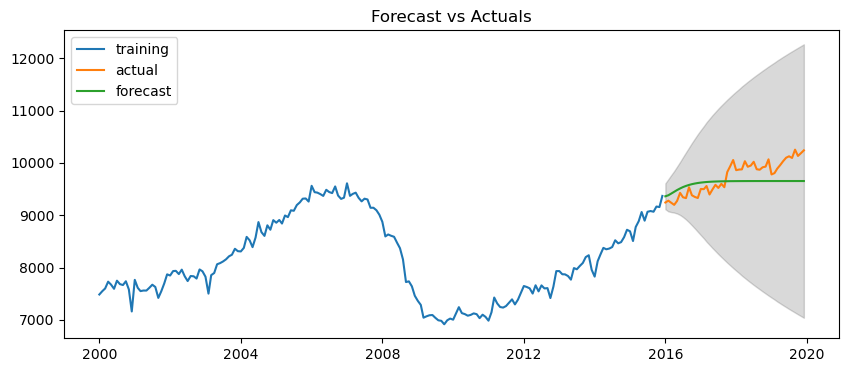

In [155]:
# Plot
plt.figure(figsize=(10,4))
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc['mean'], label='forecast')
plt.fill_between(fc.index, fc.mean_ci_lower, fc.mean_ci_upper, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=10)

## Computing MAPE and RMSE

In [170]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'mape':mape, 'rmse':rmse})


In [172]:
forecast_accuracy(fc['mean'], test.values)

{'mape': 0.0258664039045898, 'rmse': 290.4719557248122}

# Download DJIA data from FRED

In [159]:
dj=pd.read_csv("DJIA.csv", header=0, index_col=0, na_values=".")
dj.index=pd.to_datetime(dj.index)
dj=dj.ffill()
dj.columns=['price']
dj.head()

,price
observation_date,
2020-03-09,23851.02
2020-03-10,25018.16
2020-03-11,23553.22
2020-03-12,21200.62
2020-03-13,23185.62


In [161]:
dj['ret']=dj.price.pct_change()*100
dj['sqret']=dj.ret.mul(dj.ret)
dj.head()

,price,ret,sqret
observation_date,,,
2020-03-09,23851.02,NaN,NaN
2020-03-10,25018.16,4.893459,23.945946
2020-03-11,23553.22,-5.855507,34.286957
2020-03-12,21200.62,-9.988443,99.768997
2020-03-13,23185.62,9.362934,87.664528


Text(0.5, 1.0, 'DJIA Daily Returns')

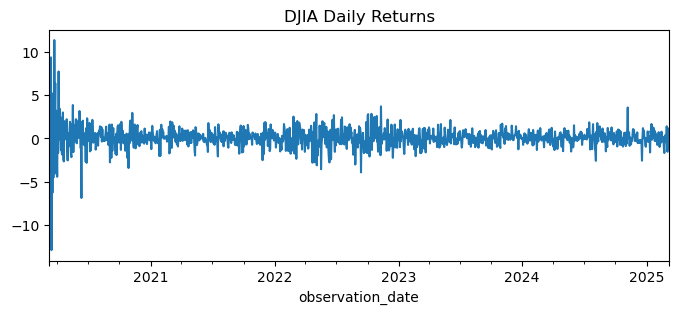

In [163]:
dj.ret.plot(figsize=(8,3))
plt.title("DJIA Daily Returns")

Text(0.5, 1.0, 'Volatility')

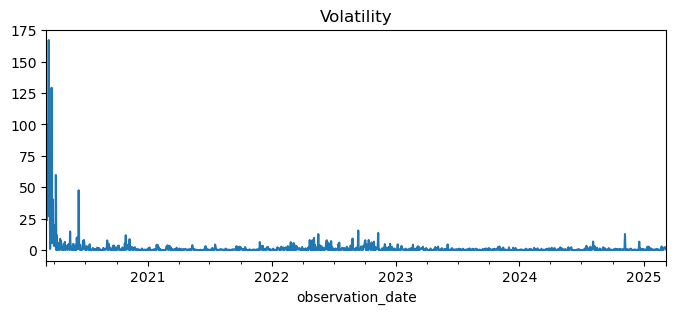

In [165]:
dj.sqret.plot(figsize=(8,3))
plt.title("Volatility",size=12)

### We observe periods of high volatility followed by periods of low volatility, this suggests that the GARCH family of models may be more appropriate for modeling the returns, as GARCH models are designed to capture changing volatility over time

In [168]:
pip install arch 

# Fit the best ARCH model

In [174]:
from arch import arch_model 

In [175]:
model_arch_1 = arch_model(dj.ret[1:], mean='Constant', vol='ARCH', p=1)
results_arch_1 = model_arch_1.fit(update_freq=2)
results_arch_1.summary()
# NOTE: R-sq will be zero for constant mean model (because it measures deviations from the mean))

Iteration:      2,   Func. Count:     12,   Neg. LLF: 681402810.5505488
Iteration:      4,   Func. Count:     23,   Neg. LLF: 1864.516389426384
Iteration:      6,   Func. Count:     32,   Neg. LLF: 1859.9800795212598
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1859.9800795212598
            Iterations: 7
            Function evaluations: 35
            Gradient evaluations: 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1859.98
Distribution:                  Normal   AIC:                           3725.96
Method:            Maximum Likelihood   BIC:                           3741.48
                                        No. Observations:                 1304
Date:                Sun, Mar 09 2025   Df Residuals:                     1303
Time:                        21:29:59   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0810  2.837e-02      2.857  4.282e-03 [2.544e-02,  0.137]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.6814  5.256e-02     12.965  1.927e-38 [  0.578,  0.784]
alpha[1]       0.4943      0.111      4.467  7.938e-06 [  0.277,  0.711]
========================================================================

Covariance estimator: robust
"""

In [176]:
model_arch_1 = arch_model(dj.ret[1:], mean='Constant', vol='ARCH', p=7)
results_arch_1 = model_arch_1.fit(update_freq=2)
results_arch_1.summary()
# NOTE: R-sq will be zero for constant mean model (because it measures deviations from the mean))

Iteration:      2,   Func. Count:     24,   Neg. LLF: 677840767.0514562
Iteration:      4,   Func. Count:     47,   Neg. LLF: 2012.2235451941585
Iteration:      6,   Func. Count:     71,   Neg. LLF: 1828.9092457244917
Iteration:      8,   Func. Count:     94,   Neg. LLF: 2221.0760817033724
Iteration:     10,   Func. Count:    118,   Neg. LLF: 1740.467039431504
Iteration:     12,   Func. Count:    140,   Neg. LLF: 1737.8097114039638
Iteration:     14,   Func. Count:    164,   Neg. LLF: 1736.4926011799826
Iteration:     16,   Func. Count:    184,   Neg. LLF: 1736.4910459934208
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1736.4910459934208
            Iterations: 17
            Function evaluations: 193
            Gradient evaluations: 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1736.49
Distribution:                  Normal   AIC:                           3490.98
Method:            Maximum Likelihood   BIC:                           3537.54
                                        No. Observations:                 1304
Date:                Sun, Mar 09 2025   Df Residuals:                     1303
Time:                        21:29:59   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0484  2.310e-02      2.095  3.615e-02 [3.124e-03,9.367e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.3136  4.508e-02      6.957  3.478e-12    [  0.225,  0.402]
alpha[1]       0.1248  5.318e-02      2.347  1.893e-02  [2.057e-02,  0.229]
alpha[2]       0.1521  3.990e-02      3.812  1.381e-04  [7.389e-02,  0.230]
alpha[3]       0.1142  4.131e-02      2.765  5.689e-03  [3.326e-02,  0.195]
alpha[4]       0.0878  5.803e-02      1.512      0.130 [-2.597e-02,  0.201]
alpha[5]       0.0379  4.592e-02      0.826      0.409 [-5.210e-02,  0.128]
alpha[6]       0.1195  4.071e-02      2.936  3.328e-03  [3.972e-02,  0.199]
alpha[7]       0.0526  3.735e-02      1.408      0.159 [-2.062e-02,  0.126]
===========================================================================

Covariance estimator: robust
"""

# Fit the best GARCH model

In [181]:
model_garch=arch_model(dj.ret[1:], mean='Constant', vol='GARCH', p=1, q=1)
results_garch=model_garch.fit(update_freq=2)
results_garch.summary()

Iteration:      2,   Func. Count:     13,   Neg. LLF: 63077.59155171602
Iteration:      4,   Func. Count:     29,   Neg. LLF: 2109.101126821215
Iteration:      6,   Func. Count:     41,   Neg. LLF: 1727.0549709606619
Iteration:      8,   Func. Count:     52,   Neg. LLF: 1727.0433743986932
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1727.0433743986932
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1727.04
Distribution:                  Normal   AIC:                           3462.09
Method:            Maximum Likelihood   BIC:                           3482.78
                                        No. Observations:                 1304
Date:                Sun, Mar 09 2025   Df Residuals:                     1303
Time:                        21:30:10   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0540  2.234e-02      2.415  1.572e-02 [1.018e-02,9.775e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0405  1.456e-02      2.785  5.357e-03 [1.201e-02,6.907e-02]
alpha[1]       0.1113  3.591e-02      3.100  1.938e-03   [4.092e-02,  0.182]
beta[1]        0.8415  4.279e-02     19.664  4.345e-86     [  0.758,  0.925]
============================================================================

Covariance estimator: robust
"""